# DETEKSI TEPI

##### Nama : Nosa Rahmanda
##### NIM : 202331195
##### Kelas : C

### IMPORT LIBRARY

Cv2 (OpenCV) untuk operasi berbasis komputer visi,
numpy (np) untuk komputasi numerik dan manipulasi array,
matplotlib.pyplot (plt) untuk visualisasi gambar/plot,
skimage untuk transformasi dan pemrosesan citra lanjutan.
Digunakan bersama untuk tugas seperti deteksi tepi, augmentasi, atau analisis citra.

In [5]:
#202331195_NosaRahmanda
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform

Kode ini menggunakan OpenCV (`cv2`) untuk membaca gambar dari file `parking.jpg` ke dalam variabel `image` sebagai array NumPy, lalu `image.shape` mengembalikan dimensi gambar dalam bentuk tuple `(height, width, channels)`, misalnya `(480, 640, 3)` untuk gambar berwarna (RGB) dengan resolusi 640x480 piksel.

In [27]:
#202331195_NosaRahmanda
image = cv2.imread('parking.jpg')
image.shape

(165, 306, 3)

Kode ini mengkonversi citra dari format BGR ke RGB menggunakan OpenCV, kemudian mengubahnya ke grayscale, dan menampilkan kedua versi citra (RGB dan grayscale) secara berdampingan menggunakan Matplotlib dalam sebuah subplot dengan ukuran 10x10.

Text(0.5, 1.0, 'GRAY')

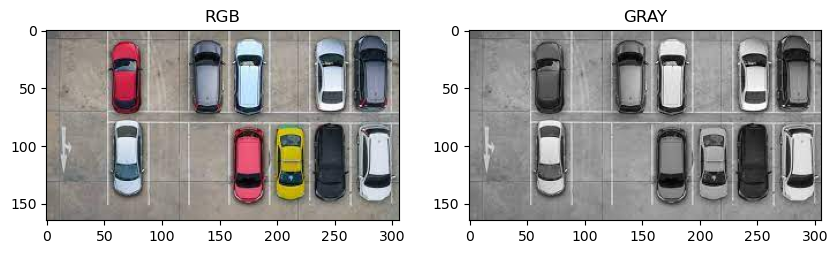

In [199]:
#202331195_NosaRahmanda
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots(1,2, figsize=(10,10))

ax = axs.ravel()
ax[0].imshow(image)
ax[0].set_title("RGB")
ax[1].imshow(img_gray, cmap='gray')
ax[1].set_title("GRAY")

### MENDETEKSI AMBANG BATAS DARI TEPI

Kode ini menggunakan OpenCV (`cv2.Canny`) untuk mendeteksi tepi pada gambar (`image`) dengan threshold bawah 100 dan atas 150, lalu menampilkan dua gambar secara berdampingan menggunakan Matplotlib: gambar asli dalam skala abu-abu (`img_gray`) dan hasil deteksi tepi (`edges`), masing-masing dengan judul "GRAY" dan "EDGES".

Text(0.5, 1.0, 'EDGES')

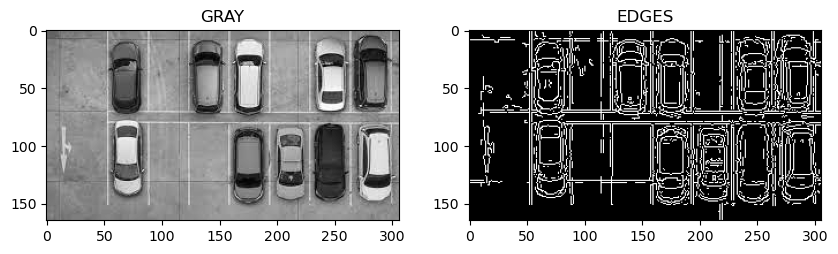

In [7]:
#202331195_NosaRahmanda
edges = cv2.Canny(image, 100, 150)
fig, axs = plt.subplots(1,2, figsize=(10,10))

ax = axs.ravel()
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title("GRAY")
ax[1].imshow(edges, cmap='gray')
ax[1].set_title("EDGES")

Kode ini mendeteksi garis lurus pada citra biner `edges` menggunakan transformasi Hough Probabilistik (`cv2.HoughLinesP`) dengan parameter threshold 90 dan maksimal gap antar garis 150 piksel. Kemudian, setiap garis yang terdeteksi (dalam bentuk koordinat titik awal `(x1,y1)` dan titik akhir `(x2,y2)`) digambar pada salinan citra asli (`img_line`) menggunakan warna ungu kemerahan `(100,80,255)` dan ketebalan 1 piksel. Hasilnya adalah citra asli dengan overlay garis-garis yang terdeteksi.

In [8]:
#202331195_NosaRahmanda
lines = cv2.HoughLinesP(edges,1,np.pi/180,90,maxLineGap=150)
img_line = image.copy()

for line in lines :
    x1,y1,x2,y2 = line[0]
    cv2.line(img_line, (x1,y1), (x2,y2), (100,80,255), 1)

Kode ini menggunakan `matplotlib` untuk membuat tiga subplot dalam satu baris (`1,3`) dengan ukuran `10x10`. Subplot pertama menampilkan gambar grayscale (`img_gray`), subplot kedua menampilkan hasil deteksi tepi (`edges`), dan subplot ketiga menampilkan gambar dengan garis tepi (`img_line`), masing-masing diberi judul "GRAY", "EDGES", dan "EDGES".

Text(0.5, 1.0, 'EDGES')

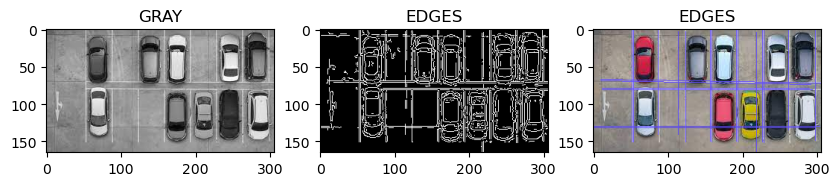

In [9]:
#202331195_NosaRahmanda
fig, axs = plt.subplots(1,3, figsize=(10,10))

ax = axs.ravel()
ax[0].imshow(img_gray, cmap='gray')
ax[0].set_title("GRAY")
ax[1].imshow(edges, cmap='gray')
ax[1].set_title("EDGES")
ax[2].imshow(img_line, cmap='gray')
ax[2].set_title("EDGES")

# OPERASI GEOMATRIK

### BACA GAMBAR

Kode ini membaca gambar `porsche_cayman.jpg` menggunakan OpenCV (`cv2.imread`), menyimpan dimensinya (tinggi, lebar, dan channel warna) dalam variabel `rows`, `cols`, dan `_`, lalu mencetak bentuk gambar tersebut (shape) dalam format `(rows, cols, channels)`. Outputnya menampilkan ukuran gambar dan jumlah saluran warnanya (misal: 3 untuk RGB).

In [36]:
#202331195_NosaRahmanda
img = cv2.imread('porsche_cayman.jpg')
rows, cols, _ = img.shape
print('img_shape: ', img.shape)

img_shape:  (637, 640, 3)


### CARA 1

Kode ini menggunakan OpenCV (`cv2.resize`) untuk memperbesar gambar (`img`) dengan faktor skala 2x pada sumbu x dan y (`fx=2, fy=2`) menggunakan interpolasi kubik (`INTER_CUBIC`), lalu menampilkan gambar asli dan hasil resize secara berdampingan dengan Matplotlib (`plt.subplots`) dalam satu figure dengan ukuran 10x5 inci.  

Text(0.5, 1.0, 'Resize Img')

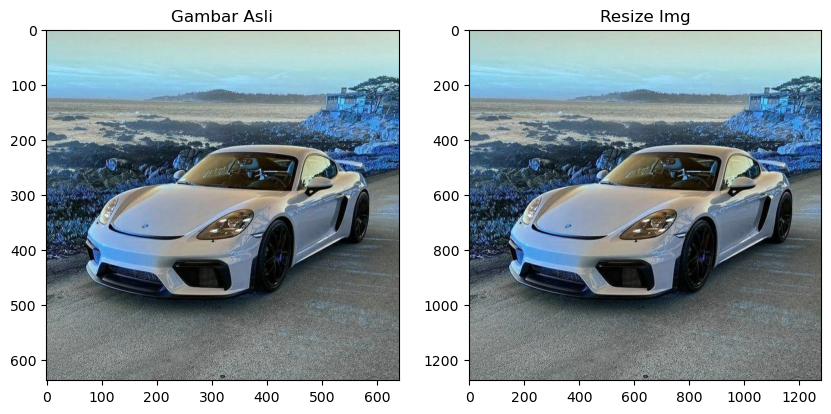

In [201]:
#202331195_NosaRahmanda
res = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
fig, axs = plt.subplots(1,2, figsize=(10,5))

ax = axs.ravel()
ax[0].imshow(img)
ax[0].set_title("Gambar Asli")
ax[1].imshow(res)
ax[1].set_title("Resize Img")

### CARA 2

Kode ini mengambil dimensi tinggi dan lebar gambar (`img`), lalu melakukan **resize 4x** menggunakan interpolasi `INTER_CUBIC` untuk hasil lebih halus. Selanjutnya, menampilkan **gambar asli** dan hasil resize secara berdampingan dengan `matplotlib`, masing-masing diberi judul untuk klarifikasi.

## PERPUTARAN CITRA/ROTASI GAMBAR

Kode ini membaca gambar **'porsche_cayman.jpg'** dalam mode grayscale (`0`) menggunakan OpenCV (`cv2`), menyimpannya dalam variabel `img_porsche`. Kemudian, mengambil dimensi gambar (tinggi `rows` dan lebar `cols`) dari atribut `shape`, lalu mencetak bentuk gambar tersebut (dalam format `(rows, cols)`).

In [203]:
#202331195_NosaRahmanda
img_porsche = cv2.imread('porsche_cayman.jpg', 0)
rows, cols = img_porsche.shape
print('img_shape: ', img_porsche.shape)

img_shape:  (637, 640)


Kode ini melakukan rotasi gambar 90 derajat searah jarum jam menggunakan OpenCV (`cv2.getRotationMatrix2D` untuk membuat matriks rotasi dan `cv2.warpAffine` untuk mengaplikasikannya), kemudian menampilkan gambar asli dan hasil rotasi side-by-side dengan Matplotlib (`plt.subplots`). Hasilnya diplot tanpa sumbu (`axis('off')`) dan diatur layoutnya agar rapi (`tight_layout()`).

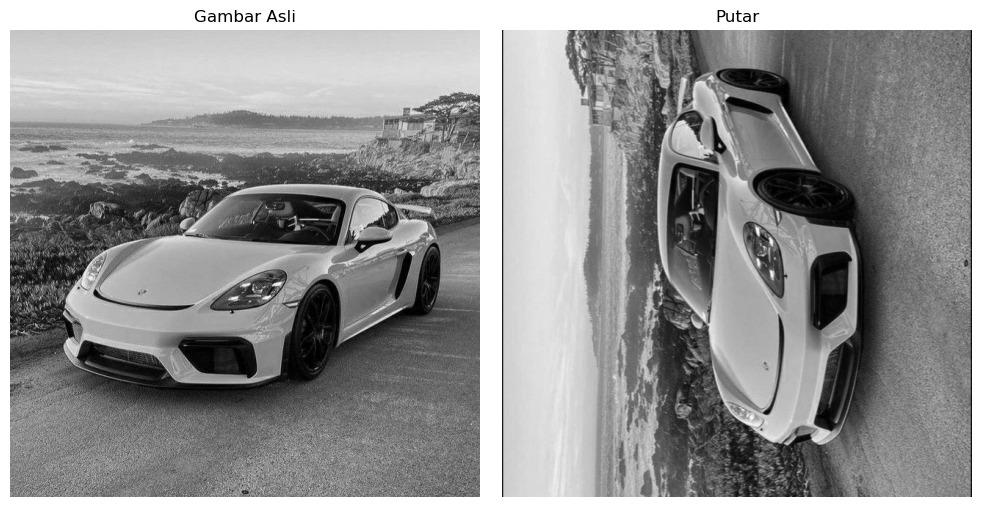

In [205]:
#202331195_NosaRahmanda
M = cv2.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 90, 1)
img_putar = cv2.warpAffine(img_porsche, M, (cols,rows))

fig, axs = plt.subplots(1,2, figsize=(10,5))
ax = axs.ravel()
ax[0].imshow(img_porsche, cmap='gray')
ax[0].set_title("Gambar Asli")
ax[1].imshow(img_putar, cmap='grey')
ax[1].set_title("Putar")

for a in axs:
    a.axis('off')
plt.tight_layout()
plt.show()

### CARA 2

Kode ini membaca gambar 'porsche_cayman.jpg', lalu memutarnya 45 derajat dalam dua versi: tanpa resize (sehingga ada area hitam di sudut) dan dengan resize (menyesuaikan ukuran canvas). Hasilnya ditampilkan dalam tiga subplot (gambar asli, rotasi tanpa resize, dan rotasi dengan resize) menggunakan matplotlib, dengan sumbu dinonaktifkan dan tata letak rapi.

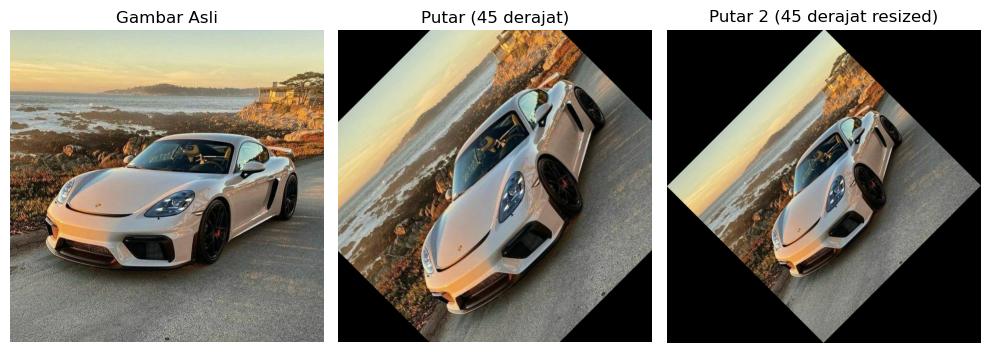

In [207]:
#202331195_NosaRahmanda
img_porsche2 = io.imread('porsche_cayman.jpg')
rotated = transform.rotate(img_porsche2, 45, resize=False)
rotated2 = transform.rotate(img_porsche2, 45, resize=True)

fig, axs = plt.subplots(1,3, figsize=(10,5))
ax = axs.ravel()
ax[0].imshow(img_porsche2, cmap='gray')
ax[0].set_title("Gambar Asli")
ax[1].imshow(rotated, cmap='grey')
ax[1].set_title("Putar (45 derajat)")
ax[2].imshow(rotated2, cmap='grey')
ax[2].set_title("Putar 2 (45 derajat resized)")

for a in axs:
    a.axis('off')
plt.tight_layout()
plt.show()

Kode ini membaca gambar 'plat.jpg' menggunakan OpenCV (`cv2.imread`) dan menyimpannya dalam variabel `t`, lalu mengambil dimensi gambar (tinggi, lebar, dan channel warna) melalui `t.shape`. Hasil dimensi gambar dicetak dalam format `img_shape: (rows, cols, channels)`. Jika gambar berwarna, channel biasanya 3 (BGR), sedangkan grayscale bernilai 1.

In [209]:
#202331195_NosaRahmanda
t = cv2.imread('plat.jpg')
rows, cols, _ = t.shape
print('img_shape: ', t.shape)

img_shape:  (576, 768, 3)


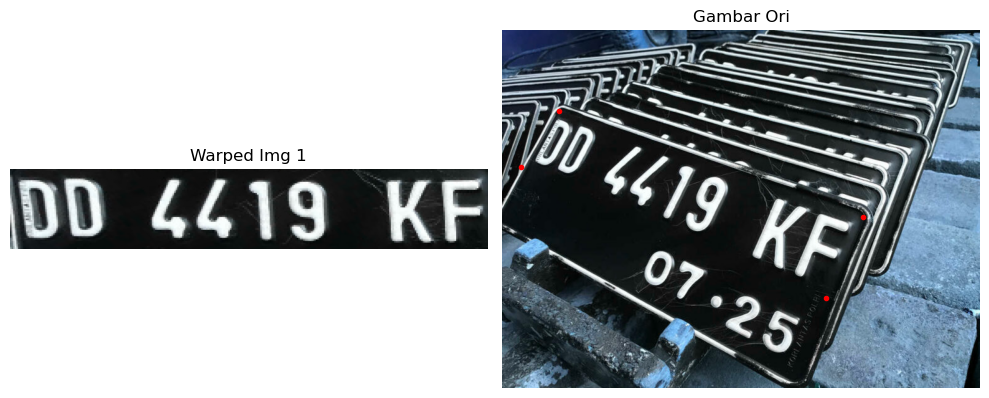

In [211]:
#202331195_NosaRahmanda
src = np.array([
    [0,0],
    [0,50],
    [300,50],
    [300,0],
])

crp = np.array([
    [90,130],
    [30,220],
    [520,430],
    [580,300],
])

tfrom = transform.ProjectiveTransform()
tfrom.estimate(src, crp)
warped = transform.warp(t, tfrom, output_shape=(50,300))

fig, axs = plt.subplots(1,2, figsize=(10,5))
ax = axs.ravel()
ax[0].imshow(warped)
ax[0].set_title("Warped Img 1")
ax[1].imshow(t)
ax[1].plot(crp[:,0], crp[:,1], '.r')
ax[1].set_title("Gambar Ori")

for a in axs:
    a.axis('off')
plt.tight_layout()
plt.show()